<a href="https://colab.research.google.com/github/Seeratijaz/Final_Project_kidney_diesese_Classification/blob/main/CKD_Classification_Using_ML_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [215]:
import math
import itertools
import numpy as np                         # Data Manipulation
import pandas as pd                        # Data Manipulation
import seaborn as sns                      # For Plotting
import matplotlib.pyplot as plt            # For Plotting
from sklearn.impute import SimpleImputer   # Predict Missing Values to Fill Nulls in the Dataset
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Importing the Dataset

Loading The Dataset

In [216]:
# Reading the CSV File
df = pd.read_csv('/content/drive/MyDrive/Final Project /kidney_disease.csv')
df = df.drop('id', axis=1)
df.head()  # Showing the DataFram

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


# Data Statistics

In [217]:
# Showing The Data Statistics
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# Data Types

In [218]:
# For Showing Data Types and NULLS in the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

# Renaming the Columns for Better Understanding

In [219]:
# Creating a dictionary to map short names to full names
column_names = {
    'age': 'Age',
    'bp': 'Blood Pressure',
    'sg': 'Specific Gravity',
    'al': 'Albumin',
    'su': 'Sugar',
    'rbc': 'Red Blood Cells',
    'pc': 'Pus Cell',
    'pcc': 'Pus Cell Clumps',
    'ba': 'Bacteria',
    'bgr': 'Blood Glucose Random',
    'bu': 'Blood Urea',
    'sc': 'Serum Creatinine',
    'sod': 'Sodium',
    'pot': 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed Cell Volume',
    'wbcc': 'White Blood Cell Count',
    'rbcc': 'Red Blood Cell Count',
    'htn': 'Hypertension',
    'dm': 'Diabetes Mellitus',
    'cad': 'Coronary Artery Disease',
    'appet': 'Appetite',
    'pe': 'Pedal Edema',
    'ane': 'Anemia',
    'class': 'Chronic Kidney Disease'
}

# Renaming columns in the dataframe
df.rename(columns=column_names, inplace=True)


# Display the combined dataframe
df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,wc,rc,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


# NULL Values Analysis

In [220]:
# Analyzing null values in the DataFrame
null_values_summary = df.isnull().sum()
null_values_percentage = (df.isnull().mean() * 100).round(2)

# Creating a DataFrame for better visualization
null_values_analysis = pd.DataFrame({
    'Number of Null Values': null_values_summary,
    'Percentage of Null Values': null_values_percentage
})

# Display the null values analysis
print(null_values_analysis)

                         Number of Null Values  Percentage of Null Values
Age                                          9                       2.25
Blood Pressure                              12                       3.00
Specific Gravity                            47                      11.75
Albumin                                     46                      11.50
Sugar                                       49                      12.25
Red Blood Cells                            152                      38.00
Pus Cell                                    65                      16.25
Pus Cell Clumps                              4                       1.00
Bacteria                                     4                       1.00
Blood Glucose Random                        44                      11.00
Blood Urea                                  19                       4.75
Serum Creatinine                            17                       4.25
Sodium                                

# Dealing with Null values in Categorical Columns

In [221]:
# Identifying categorical columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Display the names of the categorical columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria',
       'Packed Cell Volume', 'wc', 'rc', 'Hypertension', 'Diabetes Mellitus',
       'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia',
       'classification'],
      dtype='object')


In [222]:
# Initializing the SimpleImputer with the most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')

# Loop through each categorical column and apply the imputer
for col in ['Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria',
            'Packed Cell Volume', 'wc', 'rc', 'Hypertension',
            'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
            'Pedal Edema', 'Anemia', 'classification']:
    df[col] = imputer.fit_transform(df[[col]]).ravel()

# Dealing with Null values in Numerical Columns

In [223]:
# Initializing the SimpleImputer with the mean strategy for numerical columns
num_imputer = SimpleImputer(strategy='mean')

# Identifying numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column and apply the imputer
for col in numerical_columns:
    df[col] = num_imputer.fit_transform(df[[col]]).ravel()

Rechecking the NUll Values in Columns Again

In [224]:
# Analyzing null values in the DataFrame
null_values_summary = df.isnull().sum()                      # tell us the sum of null values
null_values_percentage = (df.isnull().mean() * 100).round(2) # percentage of null values

# Creating a DataFrame for better visualization
null_values_analysis = pd.DataFrame({
    'Number of Null Values': null_values_summary,
    'Percentage of Null Values': null_values_percentage
})

# Display the null values analysis
print(null_values_analysis)

                         Number of Null Values  Percentage of Null Values
Age                                          0                        0.0
Blood Pressure                               0                        0.0
Specific Gravity                             0                        0.0
Albumin                                      0                        0.0
Sugar                                        0                        0.0
Red Blood Cells                              0                        0.0
Pus Cell                                     0                        0.0
Pus Cell Clumps                              0                        0.0
Bacteria                                     0                        0.0
Blood Glucose Random                         0                        0.0
Blood Urea                                   0                        0.0
Serum Creatinine                             0                        0.0
Sodium                                

# Data Cleaning

In [225]:
# Printing the list of all unique values in each categorical column
for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].unique()}")
    print("\n")

Column: Red Blood Cells
Unique Values: ['normal' 'abnormal']


Column: Pus Cell
Unique Values: ['normal' 'abnormal']


Column: Pus Cell Clumps
Unique Values: ['notpresent' 'present']


Column: Bacteria
Unique Values: ['notpresent' 'present']


Column: Packed Cell Volume
Unique Values: ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' '41' '16' '24' '37'
 '30' '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46'
 '23' '19' '25' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']


Column: wc
Unique Values: ['7800' '6000' '7500' '6700' '7300' '9800' '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300' '7200'
 '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200

In [226]:
# Cleaning data in specific categorical columns
columns_to_clean = ['Packed Cell Volume', 'wc', 'rc', 'Diabetes Mellitus',
                    'Coronary Artery Disease', 'classification']

# Applying cleaning operations to remove unwanted characters and spaces
for col in columns_to_clean:
    df[col] = df[col].astype(str).str.strip().str.replace('\t', '').str.replace('?', '')

# Converting columns to appropriate data types where necessary
df['Packed Cell Volume'] = pd.to_numeric(df['Packed Cell Volume'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

# Checking for unique values again to verify normalization
for col in columns_to_clean:
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].unique()}")
    print("\n")

Column: Packed Cell Volume
Unique Values: [44. 38. 31. 32. 35. 39. 36. 33. 29. 28. 41. 16. 24. 37. 30. 34. 40. 45.
 27. 48. nan 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.]


Column: wc
Unique Values: [ 7800.  6000.  7500.  6700.  7300.  9800.  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.  7200.
  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200. 12500.
  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600. 10200.
  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.  4700.
 10900.  8100.  9500.  2200. 12800. 11200. 19100.    nan 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700.
 11500.  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]


Column: rc
Unique Values: [5.2 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5 4.2
 4.5 3.1 4.7 

# EDA

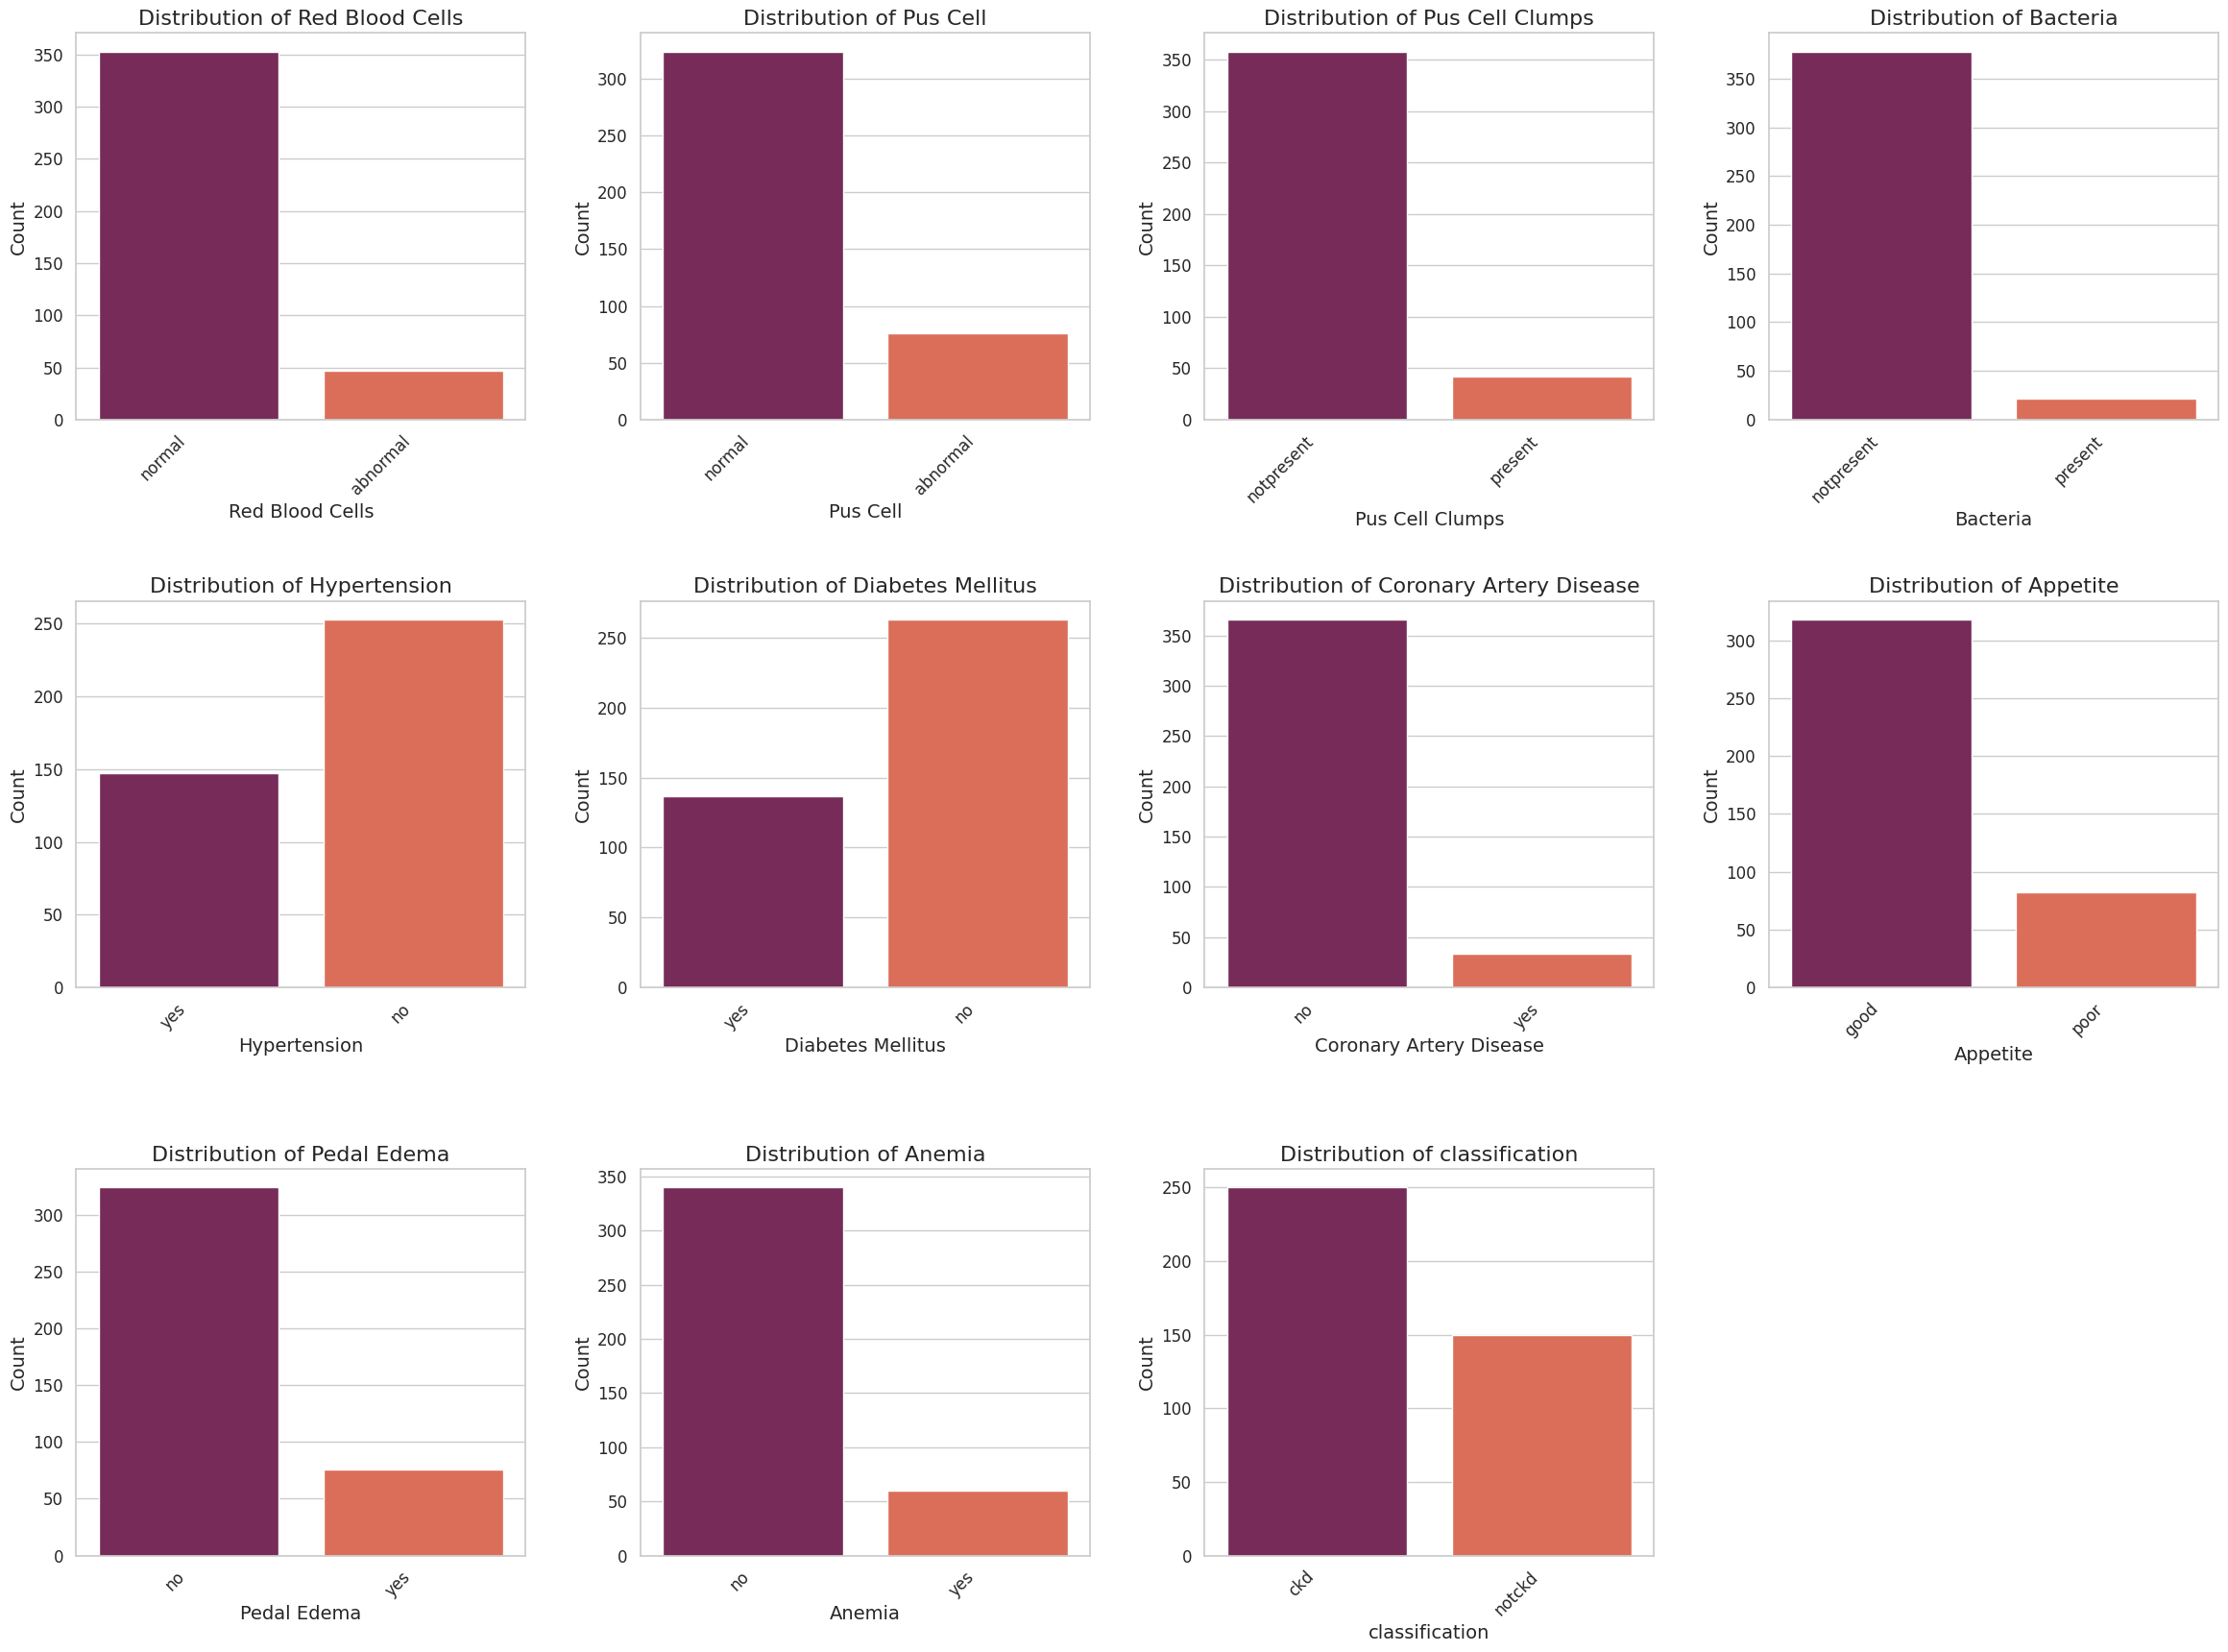

In [227]:
# Extracting categorical columns from the DataFrame
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
# Setting the style and font size for better quality and visibility
sns.set(style="whitegrid")
plt.figure(figsize=(24, 18))
plotnumber = 1

# Loop through categorical columns to create count plots
for column in categorical_columns:
    if plotnumber <= len(categorical_columns):  # Ensure it only iterates over existing columns
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data=df, x=column, hue = column, palette='rocket')
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.yticks(fontsize=12)
        ax.set_title(f'Distribution of {column}', fontsize=16)
        plotnumber += 1

plt.tight_layout(pad=3.0)
plt.show()


# Visulization of Numeric Variable

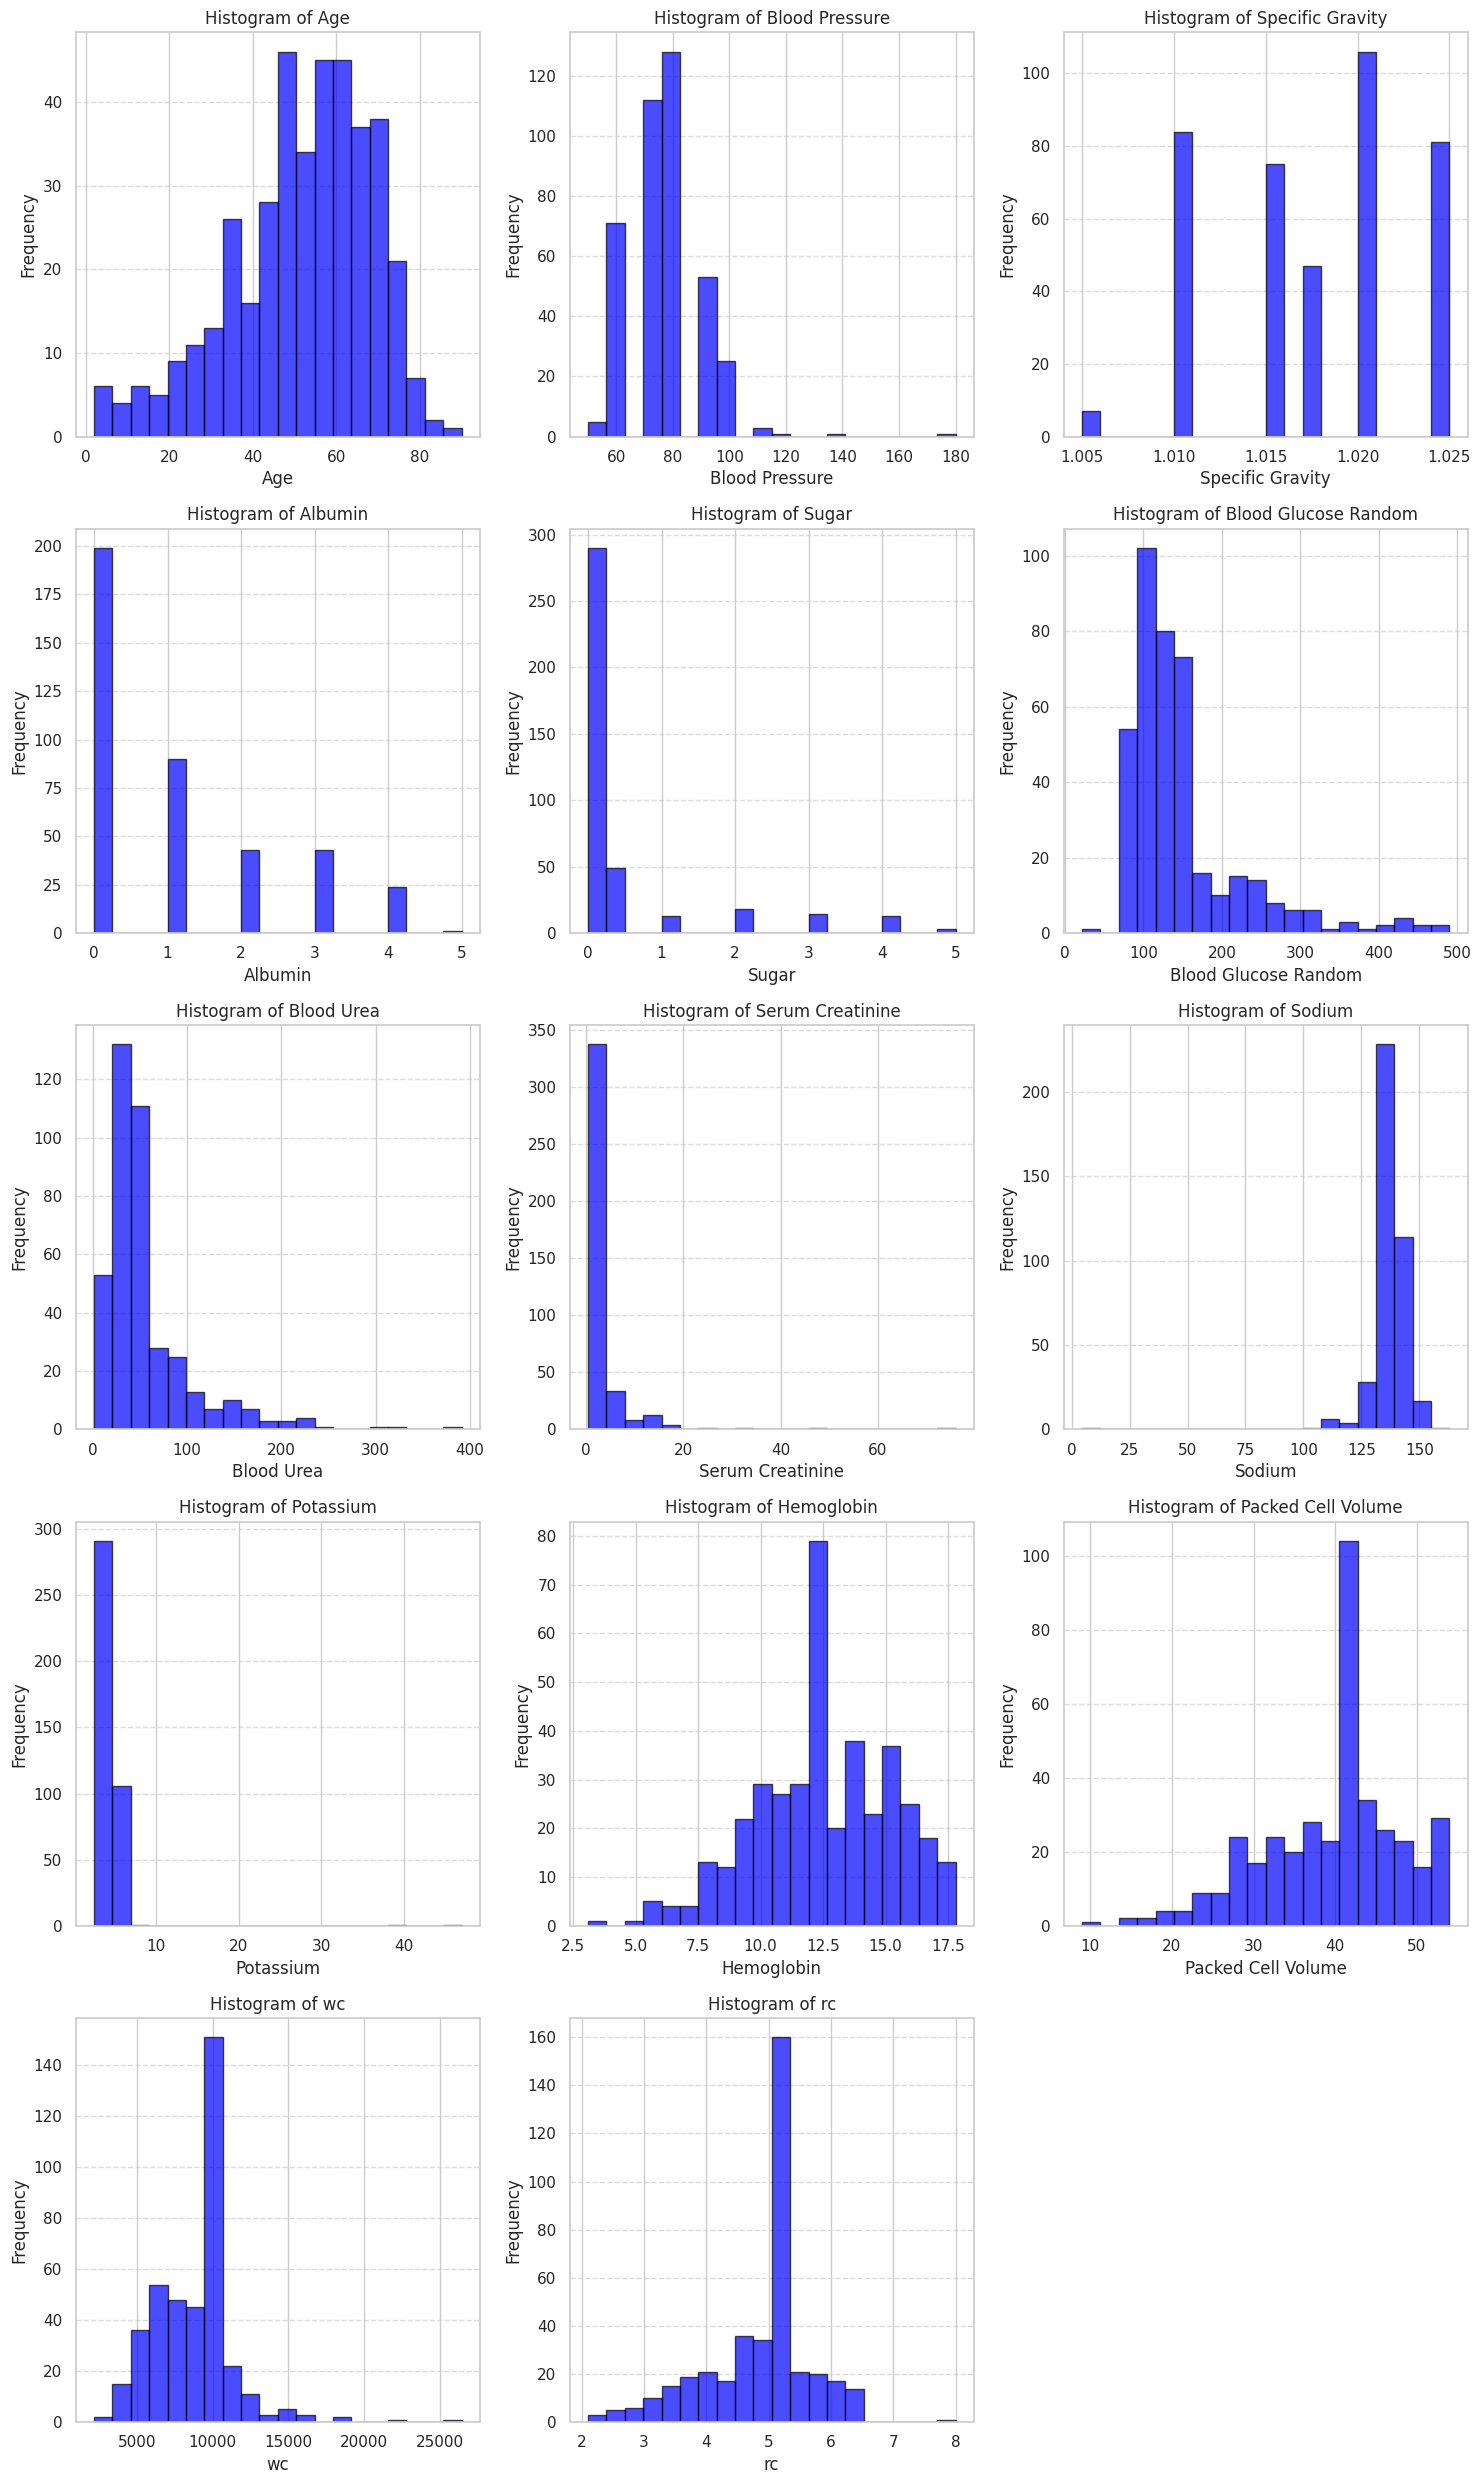

In [228]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Determine the number of subplots (grid size)
num_columns = len(numeric_columns)
rows = (num_columns // 3) + (num_columns % 3 > 0)  # 3 columns per row

# Create subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Generate histograms
for i, column in enumerate(numeric_columns):
    axes[i].hist(df[column].dropna(), bins=20, color='blue', alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide unused subplots
for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

# Correlation Heatmap

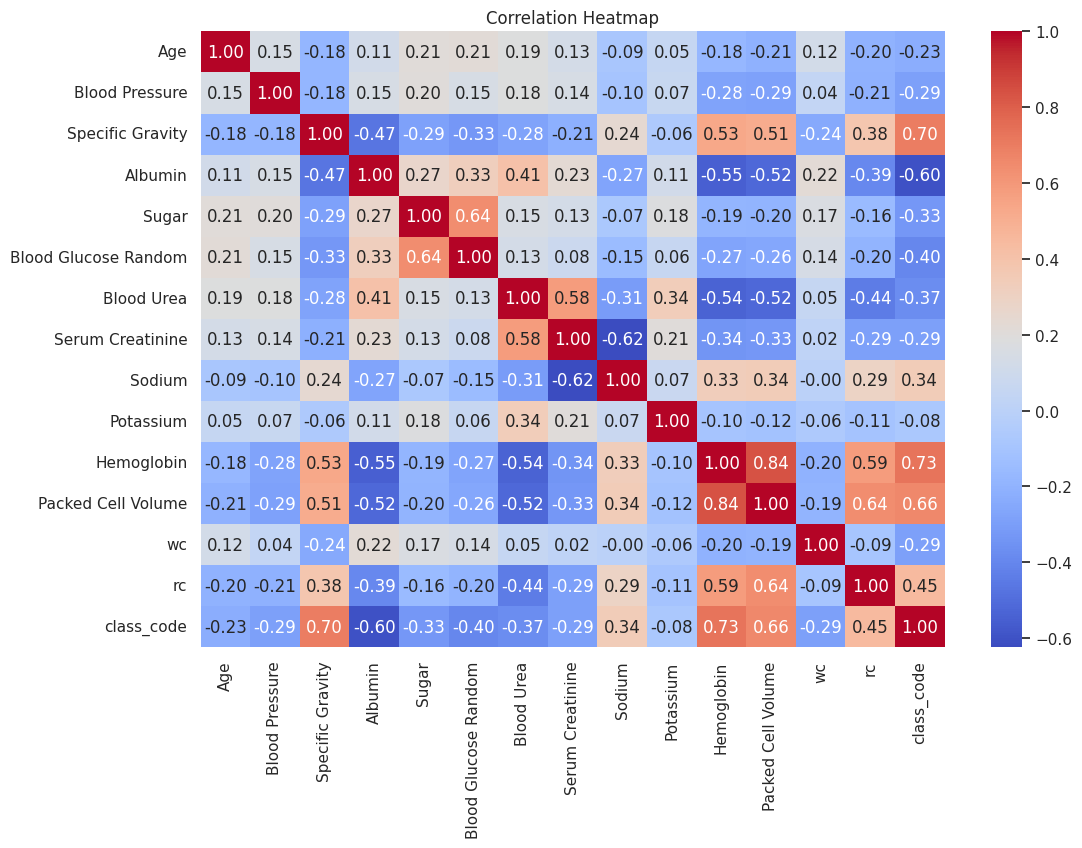

In [229]:
class_column = 'classification'  # Adjust this if needed

# Map classification labels to numeric values
class_mapping = {label: idx for idx, label in enumerate(df[class_column].unique())}
df['class_code'] = df[class_column].map(class_mapping)

# Select numeric columns for correlation
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Scatter Plot with Respect to CKD Class

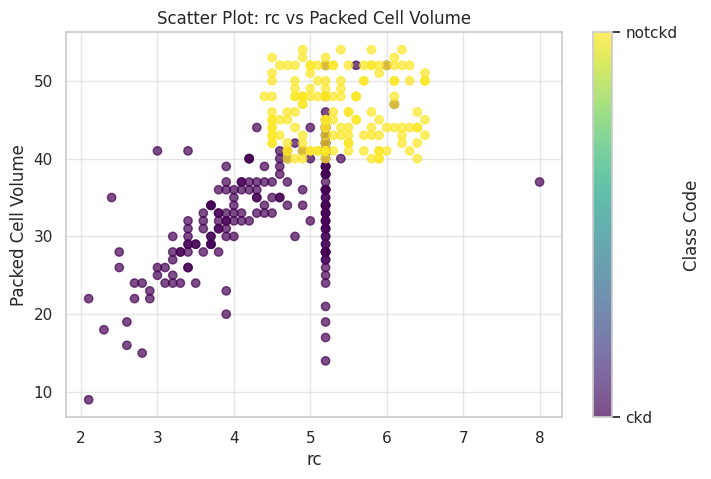

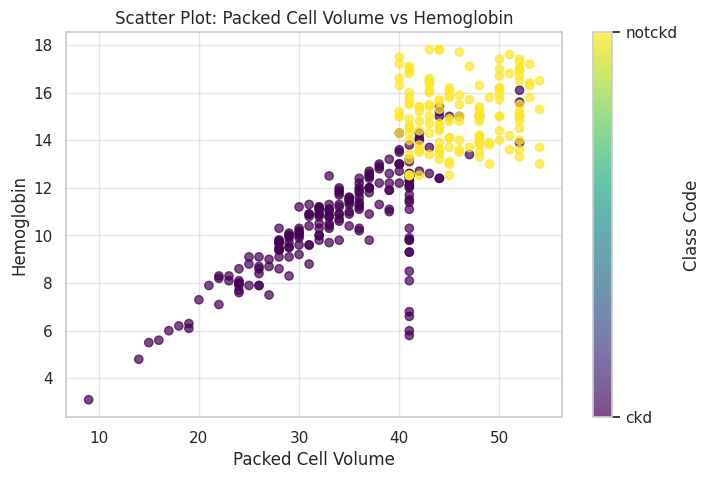

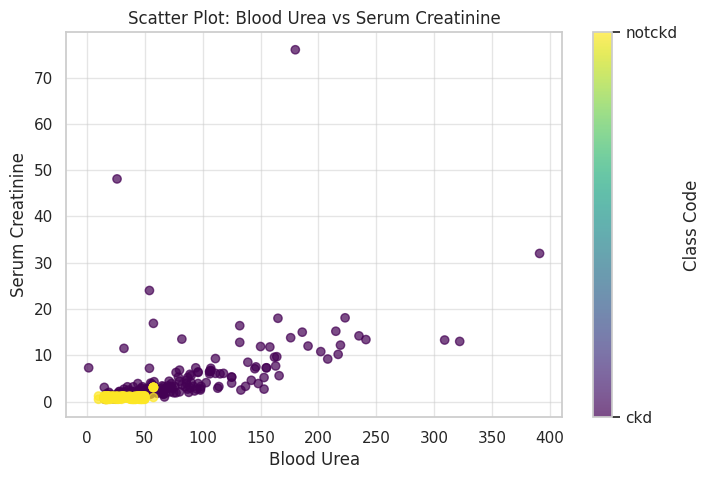

In [230]:
if 'class_code' not in df.columns:
    class_mapping = {label: idx for idx, label in enumerate(df['classification'].unique())}
    df['class_code'] = df['classification'].map(class_mapping)

# Suggested scatter plots
scatter_pairs = [
    ('rc', 'Packed Cell Volume'),
    ('Packed Cell Volume', 'Hemoglobin'),
    ('Blood Urea', 'Serum Creatinine')
]

# Generate scatter plots
for x, y in scatter_pairs:
    plt.figure(figsize=(8, 5))
    scatter = plt.scatter(df[x], df[y], c=df['class_code'], cmap='viridis', alpha=0.7)

    # Add title and labels
    plt.title(f'Scatter Plot: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)

    # Create colorbar with classification labels
    cbar = plt.colorbar(scatter, label='Class Code')
    class_labels = {v: k for k, v in class_mapping.items()}
    cbar.set_ticks(list(class_labels.keys()))
    cbar.set_ticklabels(list(class_labels.values()))

    plt.grid(alpha=0.5)
    plt.show()

# Future Encoding

 **Converting all Numerical Feature to Categorical**

In [231]:
# Identify categorical columns in the dataset
categorical_columns = df.select_dtypes(include=['object']).columns

# Perform encoding for each categorical column
for column in categorical_columns:
    if df[column].nunique() <= 2:
        # For binary categorical variables, use Label Encoding
        df[column] = df[column].map({value: idx for idx, value in enumerate(df[column].unique())})
    else:
        # For multi-class categorical variables, use One-Hot Encoding
        one_hot_encoded = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, one_hot_encoded], axis=1)
        df.drop(column, axis=1, inplace=True)

# Display the updated dataframe structure
print("Feature Encoding Completed. Updated dataframe structure:")
print(df.info())

Feature Encoding Completed. Updated dataframe structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      400 non-null    float64
 1   Blood Pressure           400 non-null    float64
 2   Specific Gravity         400 non-null    float64
 3   Albumin                  400 non-null    float64
 4   Sugar                    400 non-null    float64
 5   Red Blood Cells          400 non-null    int64  
 6   Pus Cell                 400 non-null    int64  
 7   Pus Cell Clumps          400 non-null    int64  
 8   Bacteria                 400 non-null    int64  
 9   Blood Glucose Random     400 non-null    float64
 10  Blood Urea               400 non-null    float64
 11  Serum Creatinine         400 non-null    float64
 12  Sodium                   400 non-null    float64
 13  Potassium              

# Feature Selection for Model Training

In [232]:
# Compute mutual information between features and the target
df = df.dropna()
df = df.drop(['classification'], axis=1 )
X = df.drop(['class_code'], axis=1)  # Features
y = df['class_code']                 # Target

mi = mutual_info_classif(X, y)

# Create a DataFrame to display results
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_scores)

# Select features with high mutual information
selected_features = mi_scores[mi_scores > 0.01].index.tolist()
print("Selected Features:", selected_features)

Hemoglobin                 0.445853
Packed Cell Volume         0.387804
Serum Creatinine           0.382514
Specific Gravity           0.380779
rc                         0.361445
Albumin                    0.338171
Sodium                     0.259865
Hypertension               0.238669
Blood Pressure             0.224122
Diabetes Mellitus          0.209146
Potassium                  0.206989
Blood Urea                 0.190298
Blood Glucose Random       0.161807
wc                         0.140289
Appetite                   0.125068
Anemia                     0.105859
Pus Cell Clumps            0.098455
Pedal Edema                0.085880
Sugar                      0.084454
Pus Cell                   0.081441
Red Blood Cells            0.077631
Age                        0.050550
Bacteria                   0.021172
Coronary Artery Disease    0.014595
dtype: float64
Selected Features: ['Hemoglobin', 'Packed Cell Volume', 'Serum Creatinine', 'Specific Gravity', 'rc', 'Albumin', 'Sodium'

# Choosing Top Six Features for Model Training

In [233]:
# Select the top 6 features for training
top_features = ['Hemoglobin', 'Packed Cell Volume', 'Specific Gravity',
                'Serum Creatinine', 'rc', 'Albumin']

# Create the feature matrix (X) and target vector (y)
X = df[top_features]  # Features
y = df['class_code']  # Target (assuming 'class_code' is the mapped classification column)

print("Selected Features for Model Training:")
print(X.head())

Selected Features for Model Training:
   Hemoglobin  Packed Cell Volume  Specific Gravity  Serum Creatinine   rc  \
0        15.4                44.0             1.020               1.2  5.2   
1        11.3                38.0             1.020               0.8  5.2   
2         9.6                31.0             1.010               1.8  5.2   
3        11.2                32.0             1.005               3.8  3.9   
4        11.6                35.0             1.010               1.4  4.6   

   Albumin  
0      1.0  
1      4.0  
2      2.0  
3      4.0  
4      2.0  


# Spliting Data For Traning and Testing

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Random Forest Model

In [235]:
# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples required at each leaf node
    'bootstrap': [True, False]               # Whether to bootstrap samples
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Evaluate Model

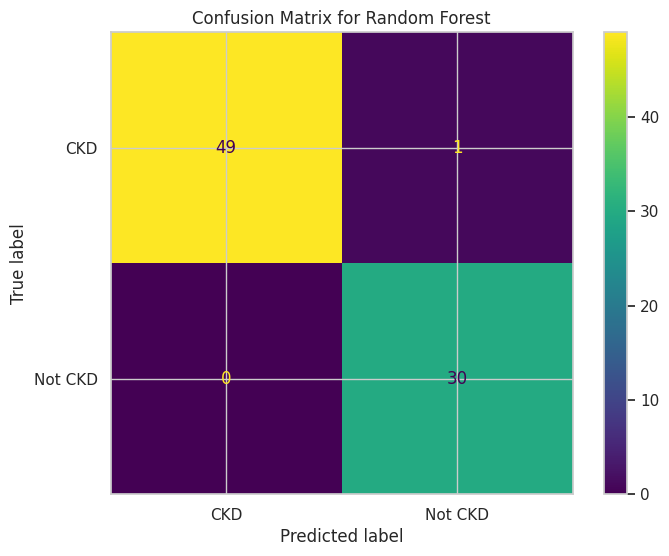

Classification Report for Random Forest:
              precision    recall  f1-score   support

         CKD       1.00      0.98      0.99        50
     Not CKD       0.97      1.00      0.98        30

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [236]:
# Evaluate the model on the test set
y_pred = best_rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['CKD', 'Not CKD'])
disp.plot(cmap='viridis', ax=plt.gca())
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Generate the classification report with updated labels
report = classification_report(y_test, y_pred, target_names=['CKD', 'Not CKD'])

# Print the classification report matrix
print("Classification Report for Random Forest:")
print(report)

# Applying Logistic Regression

In [237]:
# Define the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

In [238]:
# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization types
    'C': [0.1, 1, 10, 100],                        # Regularization strength
    'solver': ['liblinear', 'saga'],               # Solvers supporting L1 and ElasticNet
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)


In [239]:
# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_logreg = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


# Evaluate the Model

In [241]:
# Evaluating the model on the test set
y_pred = best_logreg.predict(X_test)

# Display performance metrics
print("\nClassification Report Logistic Regression:")
print(classification_report(y_test, y_pred, target_names=['CKD', 'Not CKD']))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report Logistic Regression:
              precision    recall  f1-score   support

         CKD       0.98      0.96      0.97        50
     Not CKD       0.94      0.97      0.95        30

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80


Accuracy Score: 0.9625


# Confusion Matrix

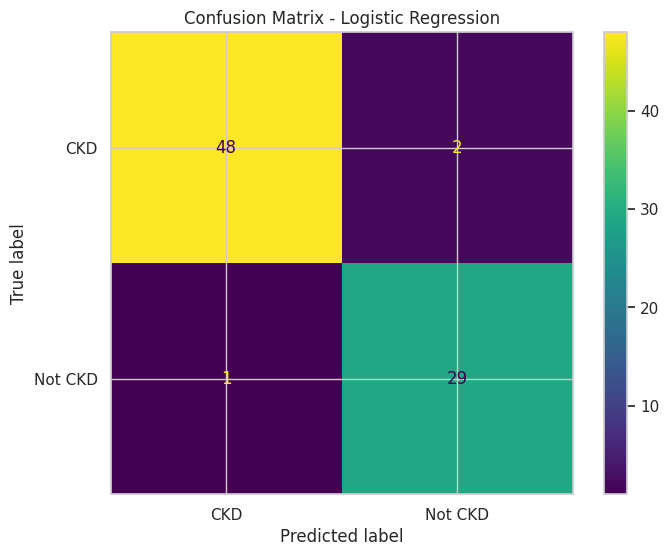

In [242]:
# Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ploting the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['CKD', 'Not CKD'])
disp.plot(cmap='viridis', ax=plt.gca())
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Applying ANN Model

In [243]:
# Defining the ANN model
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Defining the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Layer configurations
    'activation': ['relu', 'tanh', 'logistic'],                # Activation functions
    'solver': ['adam', 'sgd'],                                 # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01],                           # Regularization parameter
    'learning_rate': ['constant', 'adaptive']                 # Learning rate schedule
}

In [244]:
# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fitting the model
grid_search.fit(X_train, y_train)

# Getting the best model and its parameters
best_mlp = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


# ANN Model Evaluation

In [247]:
# Evaluating the model on the test set
y_pred = best_mlp.predict(X_test)

# Displaying performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names =['CKD', 'Not CKD']))


Classification Report:
              precision    recall  f1-score   support

         CKD       0.98      0.96      0.97        50
     Not CKD       0.94      0.97      0.95        30

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



# Confusion Matrix

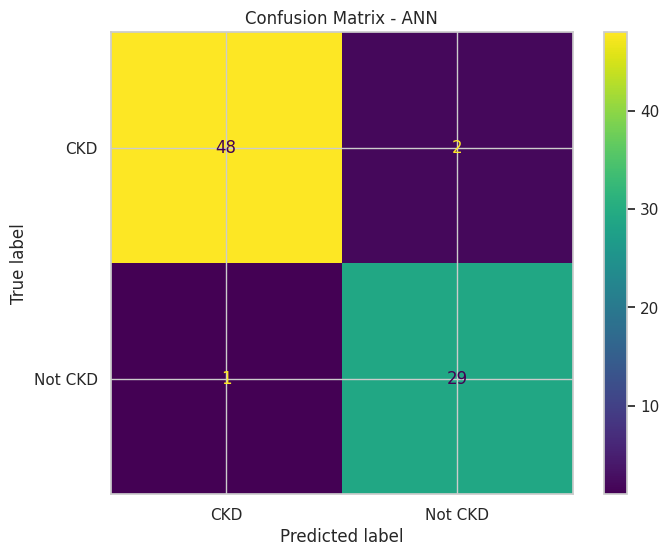

In [249]:
# Computing confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ploting the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['CKD', 'Not CKD'])
disp.plot(cmap='viridis', ax=plt.gca())
plt.title("Confusion Matrix - ANN")
plt.show()